In [18]:
import torch
import numpy as np
import soundfile as sf
import os
import librosa
from demucs.apply import apply_model
from demucs.pretrained import get_model


In [ ]:
# Input folder containing uploaded audio files
input_folder = r"/path/to/uploads/"

# Output folder (same as input to save directly in 'uploads')
output_folder = input_folder


In [20]:
# Load pretrained htdemucs model
model = get_model("htdemucs")  # Use "hdemucs_mmi" if needed
model.cpu()  # Run on CPU
print("Model Loaded Successfully")


Model Loaded Successfully


In [21]:
# List to store loaded audio files
audio_files = {}

# Specific filenames to load
specific_files = ['merged_vocal.wav', 'merged_bass.wav', 'merged_music.wav', 'merged_drum.wav']

# Load the audio files
for filename in specific_files:
    audio_path = os.path.join(input_folder, filename)

    if os.path.exists(audio_path):
        y, sr = librosa.load(audio_path, sr=44100)  # Load as mono (default)
        audio_files[filename] = (y, sr)
        print(f"Loaded {filename} with sampling rate {sr}")
    else:
        print(f"File {filename} not found in the directory.")


Loaded merged_vocal.wav with sampling rate 44100
Loaded merged_bass.wav with sampling rate 44100
Loaded merged_music.wav with sampling rate 44100
Loaded merged_drum.wav with sampling rate 44100


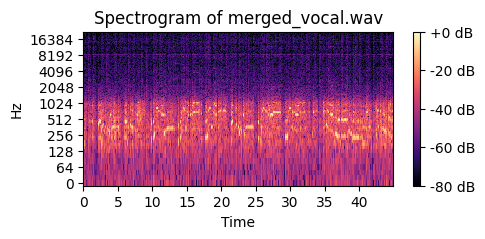

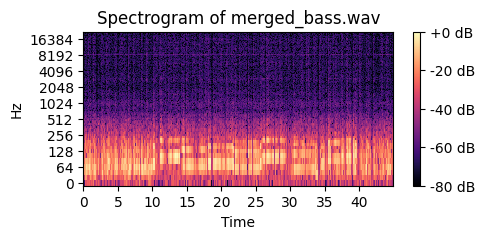

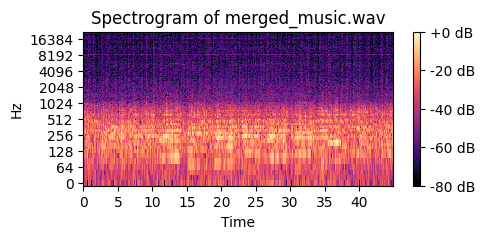

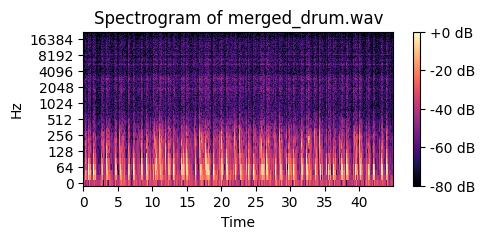

In [22]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Function to plot spectrogram
def plot_spectrogram(y, sr, title):
    D = librosa.stft(y)  # Compute STFT
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to dB scale

    plt.figure(figsize=(5, 2))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Plot spectrograms for each loaded file
for filename, (y, sr) in audio_files.items():
    plot_spectrogram(y, sr, title=f"Spectrogram of {filename}")


In [23]:
def denoise_audio(filename, y, sr):
    # Define proper naming for output files
    if "vocal" in filename.lower():
        new_filename = "denoised_vocal.wav"
    elif "bass" in filename.lower():
        new_filename = "denoised_bass.wav"
    elif "music" in filename.lower():
        new_filename = "denoised_music.wav"
    elif "drum" in filename.lower():
        new_filename = "denoised_drum.wav"
    else:
        new_filename = f"denoised_{filename}"  # Default case
    
    # Convert mono to stereo if needed
    if len(y.shape) == 1:  
        y = np.stack([y, y], axis=0)  

    waveform = torch.tensor(y).unsqueeze(0)  

    # Apply the model
    with torch.no_grad():
        sources = apply_model(model, waveform, device="cpu")

    # Extract enhanced audio (stereo output)
    denoised_signal = sources[0].numpy()
    denoised_signal = np.mean(denoised_signal, axis=0)  

    # Save the denoised file
    output_path = os.path.join(output_folder, new_filename)
    sf.write(output_path, denoised_signal.T, sr, format='WAV', subtype='PCM_16')
    
    print(f"Denoised file {new_filename} saved")  


In [24]:
# Debugging: Print all filenames before processing
print("Processing files:", list(audio_files.keys()))

# Process each loaded file
for filename, (y, sr) in audio_files.items():
    print(f"Processing: {filename}")  # Debug: See what file is currently being processed
    denoise_audio(filename, y, sr)


Processing files: ['merged_vocal.wav', 'merged_bass.wav', 'merged_music.wav', 'merged_drum.wav']
Processing: merged_vocal.wav
Denoised file denoised_vocal.wav saved
Processing: merged_bass.wav
Denoised file denoised_bass.wav saved
Processing: merged_music.wav
Denoised file denoised_music.wav saved
Processing: merged_drum.wav
Denoised file denoised_drum.wav saved


In [25]:
# List to store loaded audio files
audio_files = {}

# Specific filenames to load
specific_files = ['denoised_vocal.wav', 'denoised_bass.wav', 'denoised_music.wav', 'denoised_drum.wav']

# Load the audio files
for filename in specific_files:
    audio_path = os.path.join(input_folder, filename)

    if os.path.exists(audio_path):
        y, sr = librosa.load(audio_path, sr=44100)  # Load as mono (default)
        audio_files[filename] = (y, sr)
        print(f"Loaded {filename} with sampling rate {sr}")
    else:
        print(f"File {filename} not found in the directory.")


Loaded denoised_vocal.wav with sampling rate 44100
Loaded denoised_bass.wav with sampling rate 44100
Loaded denoised_music.wav with sampling rate 44100
Loaded denoised_drum.wav with sampling rate 44100


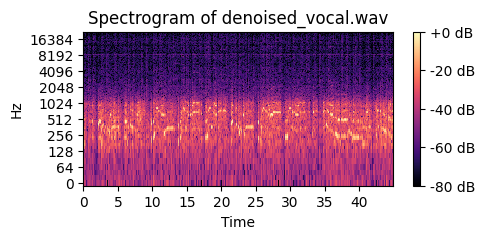

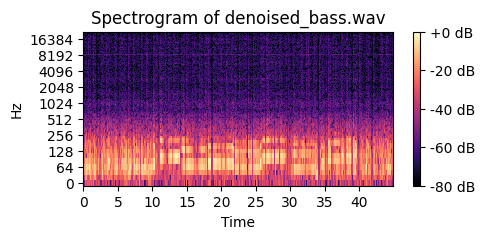

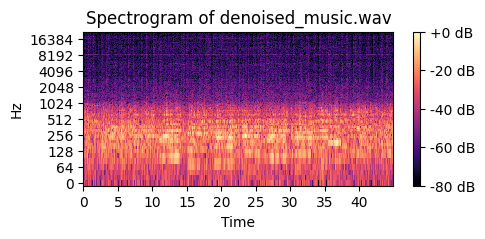

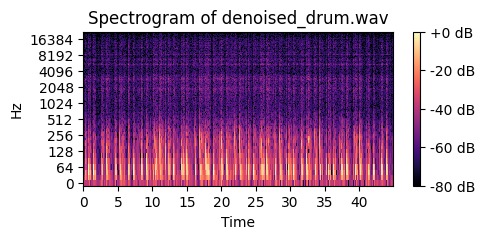

In [26]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

# Function to plot spectrogram
def plot_spectrogram(y, sr, title):
    D = librosa.stft(y)  # Compute STFT
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to dB scale

    plt.figure(figsize=(5, 2))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.show()

# Plot spectrograms for each loaded file
for filename, (y, sr) in audio_files.items():
    plot_spectrogram(y, sr, title=f"Spectrogram of {filename}")
